### Final Project: Data Science Programme — Cambridge University & Flatiron School

**Dataset:** Rio de Janeiro's Airbnb Data<br>
The Dataset was downloaded from [Airbnb's InsideData website](http://insideairbnb.com/get-the-data.html).



<u>**Why analyse AirBnB's data?**</u><br>

Rental patterns are a good way to understand the socio-economic trends of a city. Rio de Janeiro it's an interesting case because:
- It's a popular holiday spot;
- It was the host of massive vents in the past decade (Olympics and World Cup), which created a surplus of rentals; 
- Neighbourhood dynamics are volatile - violence and inequality are key factors in urban-social dynamics.

<u>**Some guiding questions of this EDA:**</u>
- Types of rentals available by neighbourhood;
- Distribution of rentals by neighbourhood;
- Price ranges and distributions;
- Average price by type of room and neighbourhood;
- Most popular listings.

---

### <u>Importing our data and installing libraries</u>

In [1235]:
# installing all the libraries I'll use in this EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1236]:
df = pd.read_csv("airbnb_rio.csv")
df.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Copacabana,-22.96592,-43.17896,Entire home/apt,200,5,260,2021-02-08,2.00,1,334
1,24480,Nice and cozy near Ipanema Beach,99249,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,37
2,35636,Cosy flat close to Ipanema beach,153232,Ipanema,-22.98816,-43.19359,Entire home/apt,275,2,181,2020-03-15,2.00,1,236
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Copacabana,-22.98127,-43.19046,Entire home/apt,120,3,356,2021-03-06,2.79,1,120
4,41198,"Modern 2bed,Top end of Copacabana",178975,Copacabana,-22.97962,-43.19230,Entire home/apt,494,3,18,2016-02-09,0.18,2,365


In [1237]:
#check shape of the data frame

df.shape

(26628, 14)

In [1238]:
#check type

type(df)

pandas.core.frame.DataFrame

----
### <u>Creating a DataFrame subset with the variables I want to explore:</u>

In [1239]:
# Selecting the columns

df1 = ["neighbourhood", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews"]
df1 = df[df1]
df1.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
0,Copacabana,-22.96592,-43.17896,Entire home/apt,200,5,260
1,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85
2,Ipanema,-22.98816,-43.19359,Entire home/apt,275,2,181
3,Copacabana,-22.98127,-43.19046,Entire home/apt,120,3,356
4,Copacabana,-22.97962,-43.19230,Entire home/apt,494,3,18


In [1240]:
# Checking for duplicates

df1.duplicated().value_counts()

False    26613
True        15
dtype: int64

In [1241]:
# Removing duplicates

df1 = df1.drop_duplicates()

In [1242]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26613 entries, 0 to 26627
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   neighbourhood      26613 non-null  object 
 1   latitude           26613 non-null  float64
 2   longitude          26613 non-null  float64
 3   room_type          26613 non-null  object 
 4   price              26613 non-null  int64  
 5   minimum_nights     26613 non-null  int64  
 6   number_of_reviews  26613 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.6+ MB


In [1243]:
# Checking initial statistics

df1.describe().round(1)

,latitude,longitude,price,minimum_nights,number_of_reviews
count,26613.0,26613.0,26613.0,26613.0,26613.0
mean,-23.0,-43.2,750.0,4.7,12.2
std,0.0,0.1,5637.9,19.1,29.9
min,-23.1,-43.7,0.0,1.0,0.0
25%,-23.0,-43.3,150.0,1.0,0.0
50%,-23.0,-43.2,264.0,2.0,2.0
75%,-23.0,-43.2,537.0,4.0,9.0
max,-22.7,-43.1,629236.0,1000.0,447.0


-----
### <u>Checking for outliers and cleaning the DF</u><br>
The description is showing that there are:
- Outliers in the price (max) feature;
- Listings with no reviews;
- Average of 4.7 minimum nights for the rentals;
- Listings with number of minimum nights to rent of more than 4 years!


Listings with price over R$1000: 3010


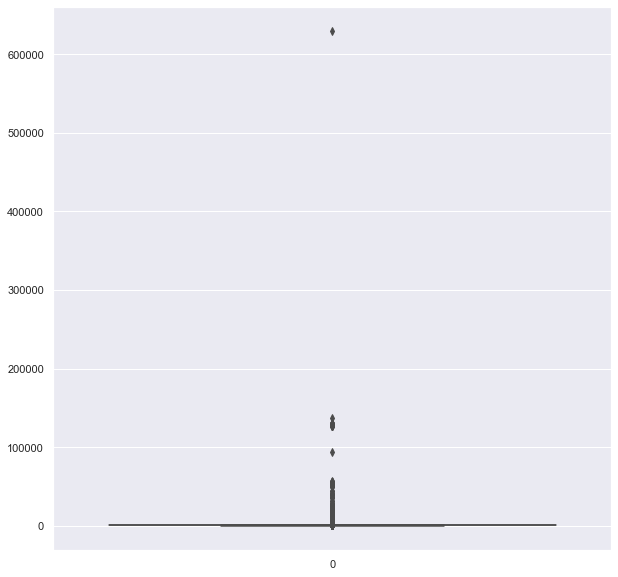

In [1244]:
# Visualizing value distribution for the price feature

plt.figure(figsize = (10,10))

boxplot = sns.boxplot(data=df1["price"])
print(f"\nListings with price over R$1000: {len(df1[df1.price > 1000])}")

#### Keeping the datapoints that have a rental price of more than R$1000

In [1245]:
#Removing the listings with a price > 1000

df1 = df1.drop(df1[df1.price > 1000].index) 

In [1246]:
#checking the removal

df1.nlargest(5, "price")

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
135,Copacabana,-22.97254,-43.18939,Entire home/apt,1000,5,2
492,Leblon,-22.98279,-43.21996,Entire home/apt,1000,7,0
564,Tijuca,-22.92296,-43.22930,Private room,1000,7,0
607,Leblon,-22.98185,-43.22226,Entire home/apt,1000,4,27
638,Barra da Tijuca,-23.00300,-43.36649,Entire home/apt,1000,4,0


#### Now, let's do the same for the "minimum nights" feature


Listings with more than a month of minimum rental: 180


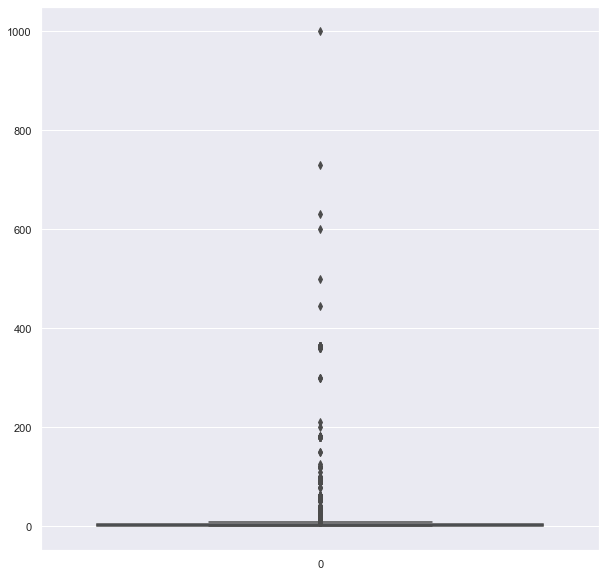

In [1247]:
# Visualizing value distribution for the minimum nights feature

plt.figure(figsize = (10,10))

boxplot = sns.boxplot(data=df1["minimum_nights"])
print(f"\nListings with more than a month of minimum rental: {len(df1[df1.minimum_nights > 30])}")

**<u>Droppin the listings with over 30 days of minimum rental period</u>**

In [1248]:
# removing listings with more than 30 days of minimum rental

df1 = df1.drop(df1[df1.minimum_nights > 30].index) 

In [1249]:
#checking the removal

df1.nlargest(5, "minimum_nights")

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
246,Flamengo,-22.93990,-43.17574,Private room,347,30,115
691,Leme,-22.96271,-43.17349,Entire home/apt,468,30,7
1098,Vila Isabel,-22.91414,-43.23917,Private room,54,30,0
1120,Gávea,-22.98091,-43.23548,Entire home/apt,350,30,15
1161,Copacabana,-22.97531,-43.18971,Entire home/apt,139,30,152


#### Lastly, let's remove the listings that don't have 1 review


Listings with no reviews: 7681


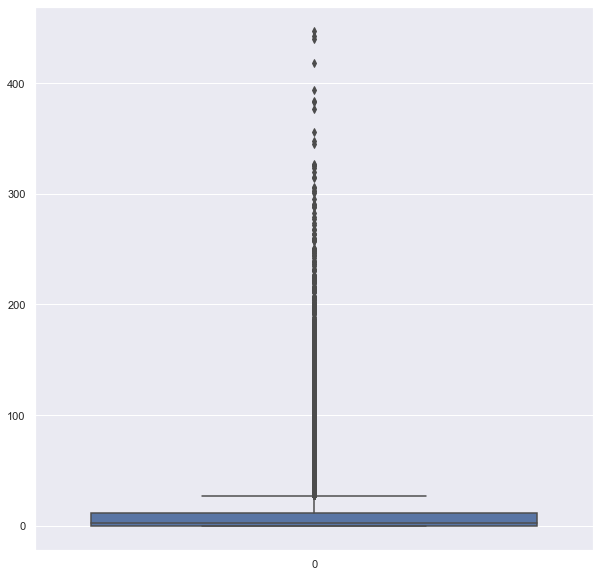

In [1250]:
# Visualizing value distribution for the number of reviews feature

plt.figure(figsize = (10,10))

boxplot = sns.boxplot(data=df1["number_of_reviews"])
print(f"\nListings with no reviews: {len(df1[df1.number_of_reviews < 1])}")

**<u>Dropping the listings with no reviews</u>**

In [1251]:
# removing listings with no reviews

df1 = df1.drop(df1[df1.number_of_reviews < 1].index) 

In [1252]:
#Checking the last edit

df1.nsmallest(5, "number_of_reviews")

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
14,Flamengo,-22.92873,-43.17473,Entire home/apt,180,4,1
39,São Conrado,-22.99893,-43.27047,Shared room,110,1,1
60,Maracanã,-22.91549,-43.22626,Private room,300,1,1
73,Copacabana,-22.96656,-43.18575,Entire home/apt,170,3,1
77,Vidigal,-22.99442,-43.23544,Entire home/apt,439,3,1


### Visualizing the edited DataFrame

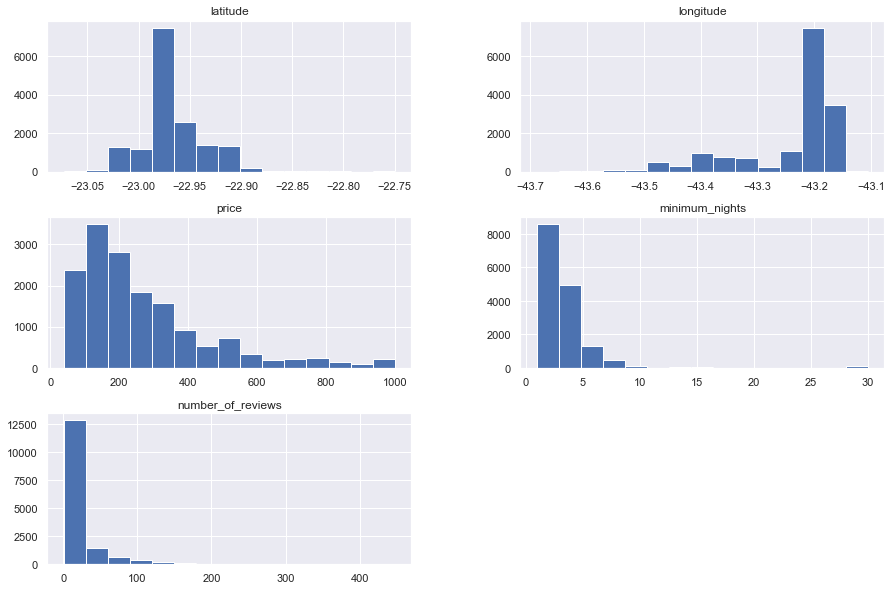

In [1253]:
df1.hist(bins=15, figsize=(15,10));

----
### <u>Exploring the Neighbourhoods</u>

In [1254]:
#Checking the neighbourhoods with more listings

df1.neighbourhood.value_counts() 

Copacabana          5117
Ipanema             1643
Barra da Tijuca     1504
Botafogo             816
Leblon               767
                    ... 
Inhoaíba               1
Magalhães Bastos       1
Ribeira                1
Abolição               1
Sepetiba               1
Name: neighbourhood, Length: 134, dtype: int64

- The data suggests that there is a clear concentration of listings in a handful of neighbourhoods: Copacabana, Ipanema, and Barra da Tijuca.
- Several neighbourhoods with only 1 listing

In [1255]:
# Creating a top 15 series in order to visualize the distribution

top15 = df1["neighbourhood"].value_counts().nlargest(15)
top15

Copacabana                  5117
Ipanema                     1643
Barra da Tijuca             1504
Botafogo                     816
Leblon                       767
Jacarepaguá                  708
Recreio dos Bandeirantes     621
Santa Teresa                 554
Centro                       496
Flamengo                     409
Leme                         340
Laranjeiras                  245
Tijuca                       193
Camorim                      168
Catete                       155
Name: neighbourhood, dtype: int64

**In order to handle the data more clearly, I'll group the rest of neighbourhoods into a new category, "Various", using a *for loop*.**

In [1278]:
df1.neighbourhood = [x if x in top15 
                       else "Various"
                     for x in  df1.neighbourhood]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Copacabana'),
  Text(1, 0, 'Ipanema'),
  Text(2, 0, 'Barra da Tijuca'),
  Text(3, 0, 'Botafogo'),
  Text(4, 0, 'Leblon'),
  Text(5, 0, 'Jacarepaguá'),
  Text(6, 0, 'Recreio dos Bandeirantes'),
  Text(7, 0, 'Santa Teresa'),
  Text(8, 0, 'Centro'),
  Text(9, 0, 'Flamengo'),
  Text(10, 0, 'Leme'),
  Text(11, 0, 'Laranjeiras'),
  Text(12, 0, 'Tijuca'),
  Text(13, 0, 'Camorim'),
  Text(14, 0, 'Catete')])

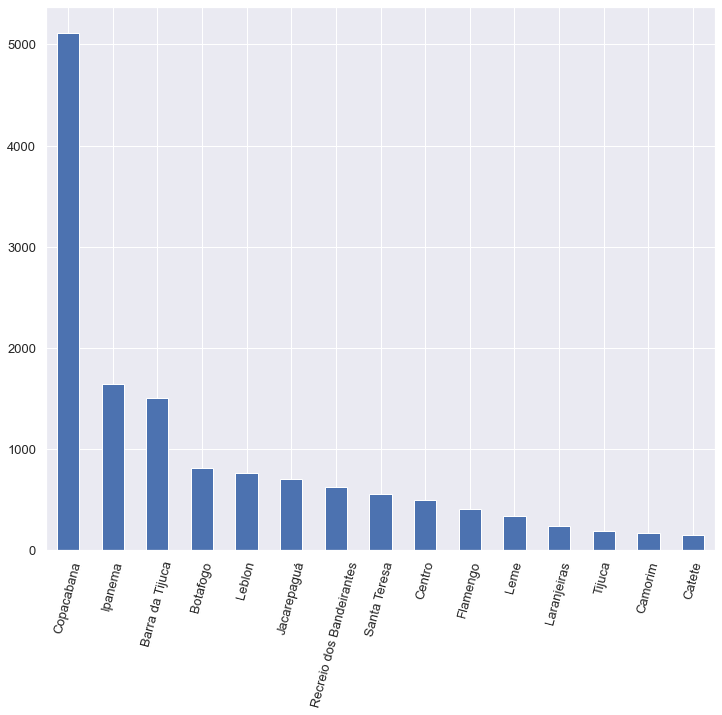

In [1283]:
plt.figure(figsize = (12,10))
top15.plot(kind="bar", fontsize=13)
plt.xticks(rotation="75")

----
### Exploring the "Price" feature

In [1258]:
# Checking the average price

df1["price"].mean()

272.89054757972303

In [1262]:
# Checking the average price by neighbourhood

price_neigh = df1[["neighbourhood", "price"]].groupby("neighbourhood").agg(["mean", "max", "min"]).sort_values(by=("price", "mean"), ascending=False).round(1)
price_neigh.head(10)

price          
                           mean   max min
neighbourhood                            
Leblon                    404.1  1000  59
Ipanema                   355.2  1000  50
Barra da Tijuca           342.6  1000  55
Recreio dos Bandeirantes  306.9  1000  50
Jacarepaguá               277.3  1000  50
Leme                      263.8  1000  40
Copacabana                257.8  1000  40
Camorim                   240.6  1000  77
Botafogo                  235.0  1000  40
Laranjeiras               234.5  1000  40

In [1259]:
# Creating a new data frame to check the average price by room type

price_type = df1[["room_type", "price"]].groupby("room_type").agg(["mean"]).sort_values(by=("room_type"), ascending=True).round(1) 
price_type

,price
,mean
room_type,
Entire home/apt,309.2
Hotel room,192.5
Private room,174.9
Shared room,118.9


- We now know that entire home/apartment is the most expensive room type — kind of obvious, but it's good to have confirmation of assumptions

In [1260]:
# Checking the room type available by neighbourhood

room_neigh = df1.groupby(["room_type", "neighbourhood"])["neighbourhood"].count()
room_neigh.head(10)

room_type        neighbourhood  
Entire home/apt  Barra da Tijuca    1146
                 Botafogo            541
                 Camorim             126
                 Catete              122
                 Centro              391
                 Copacabana         4123
                 Flamengo            285
                 Ipanema            1371
                 Jacarepaguá         496
                 Laranjeiras         142
Name: neighbourhood, dtype: int64

#### Now, I want to see if the price has some relation with the number of reviews the listings received

Text(0, 0.5, 'Number of Reviews')

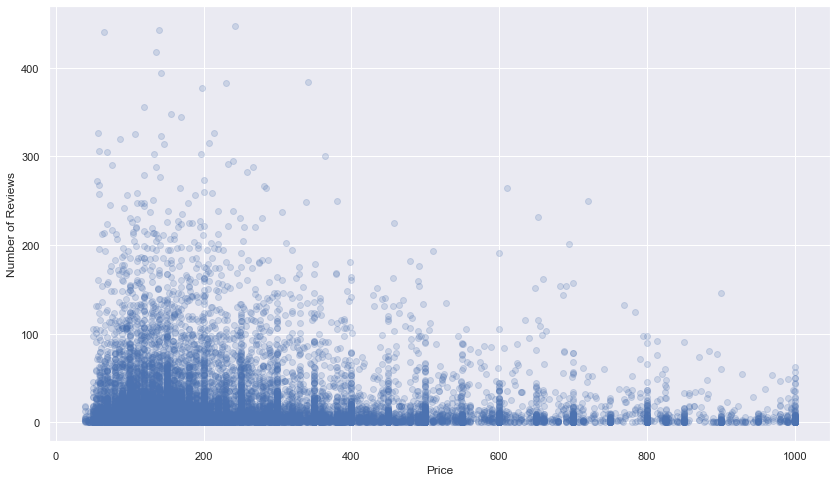

In [1279]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(df1["price"], df1["number_of_reviews"], alpha=0.2)
ax.set_xlabel("Price")
ax.set_ylabel("Number of Reviews")

- The data suggest that cheaper listings got more reviews. This could be associated to the fact that people usually search for the best deal possible in order to save money on their travelling arrangements.
<br>

- The results suggest that although Copacabana is the most popular neighbourhood for Airbnb rentals, the average price is lower than for other neighbourhoods. More listings, more price competition. 

-----
### <u>Exploring the "Number of Reviews" variable</u>

In [1263]:
# Checking the listings by number of reviews 

df1.number_of_reviews.value_counts()

1      2940
2      1774
3      1230
4       961
5       719
       ... 
251       1
383       1
283       1
291       1
267       1
Name: number_of_reviews, Length: 271, dtype: int64

In [1264]:
#Creating a top 10 review count 

top_reviews = df1["number_of_reviews"].value_counts().nlargest(10)
top_reviews

1     2940
2     1774
3     1230
4      961
5      719
6      571
7      464
8      428
9      366
10     325
Name: number_of_reviews, dtype: int64

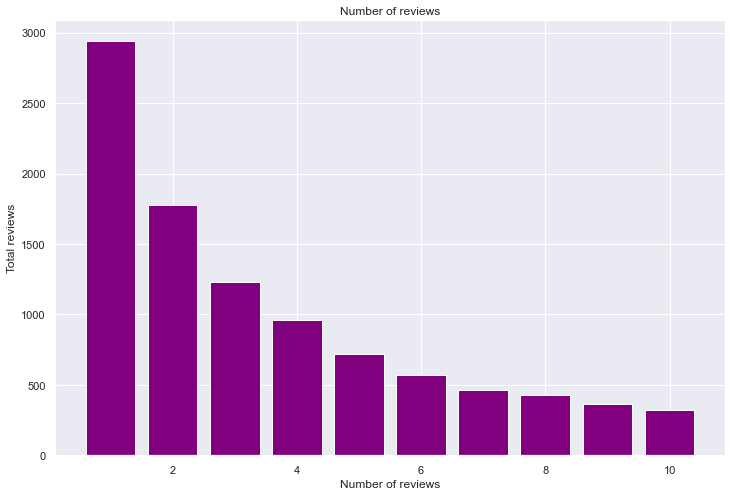

In [1280]:
#Visualizing the number of reviews by count

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x=top_reviews.index, height=top_reviews, color="purple")
ax.set_xlabel("Number of reviews")
ax.set_ylabel("Total reviews")
ax.set_title("Number of reviews");

- The majority of the listings have only 1 review. Given that we don't have a date feature (first listed), it's difficult to formulate assumptions regarding the recurrence of rentals.

-----
### Geographical exploration of the DF

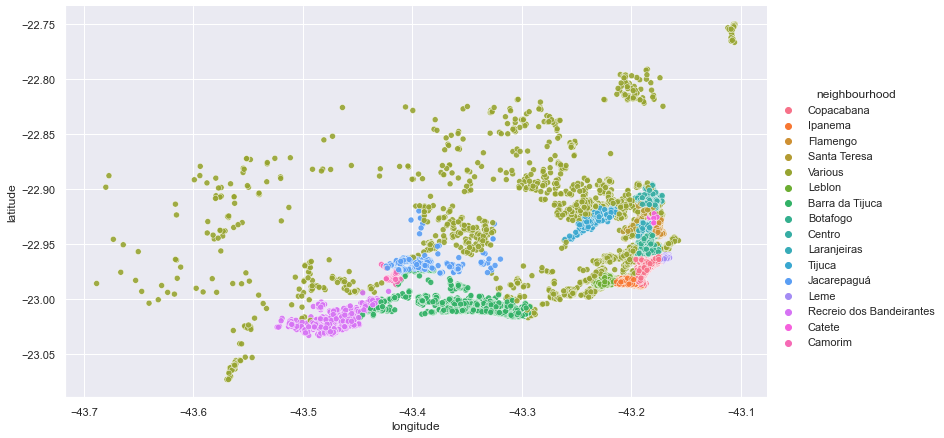

In [1267]:
# And finally, checking the neighbourhood distribution


sns.relplot(x='longitude', y='latitude', data=df1,   
            kind='scatter', hue='neighbourhood', alpha=0.9,
            height=6, aspect=1.8)

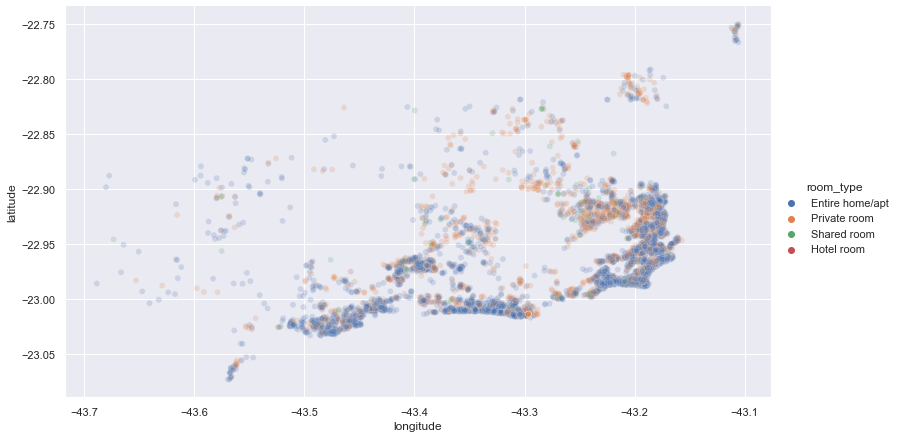

In [1285]:
# Using seaborn to map the room type distribution

sns.relplot(x='longitude', y='latitude', data=df1,   
            kind='scatter', hue='room_type', alpha=0.2,
            height=6, aspect=1.8)

**These two maps suggests that:**
- Costal neighbourhoods are very popular: Copacabana, Leblon, Ipanema, Barra da Tijuca, among others.
- Room types have a relation to costal neighbourhoods: entire home/apts are mostly found in beach-side neighbourhoods
- Private rooms are mostly distributed in the downtown area
- The key touristic spots have a good concentration of listings